# Mudança de Frequência de Amostragem


Mudança de frequência de amostragem é uma técnica que pode ser necessária em diversas situações. Suponha que dois sinais tenham sido digitalizados com frequências de amostragem diferentes, neste caso, para somá-los, é necessários realizar a mudança da frequência de amostragem para que ambos estejam na mesma taxa. Outra situação em que podemos utilizar a mudança de frequência de amostragem é para ajustá-la de acordo com as características do sinal. Por exemplo, um sinal de fala possui a maior parte de sua energia até, aproximadamente, 4 kHz. Um sinal de fala gravado a 44.1kHz pode ser ajustado para 8820Hz, sem perder informação significativa do sinal. Assim será possível utilizar menos amostras para representá-lo. Para melhor visualizar o espectrograma do sinal de fala também é conveniente realizar uma reamostragem, mantendo apenas a informação relevante. Algumas técnicas também fazem uso da mudança de frequência de amostragem, como por exemplo: oversampling, decomposição polifásica de filtros e processamento de sinais multi-taxa. As operações envolvidas na mudança de frequência de amostragem são:

* downsample
* upsample
* decimação 
* filtro anti-aliasing
* interpolação

Estas fuções, no GNU Octave, estão no pacote **signal**.

In [1]:
pkg load signal

Para exemplificar, vamos considerar inicialmente um sinal senoidal, conforme ilustrado abaixo.

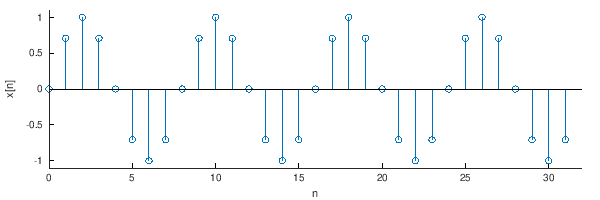

In [2]:
n_samples = 32;
n = [0:n_samples-1];
w0 = pi/4;
x = sin(n*w0);
figure(1, 'position',[0,0,600,200]);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]);

O sinal $x[n]$ pode ser representado no domínio da frequência através da FFT. Ilustramos abaixo o gráfico do espectro do sinal $X(j\omega)$. Observe o pico em $w_0 = \pi/4$, conforme definimos acima. Além disso, como o sinal $x[n]$ é real, teremos que $\vert X(j\omega) \vert$ terá simetria par, como podemos observar (o gráfico abaixo poderia ser feito apenas no intervalo [0, $\pi$]).

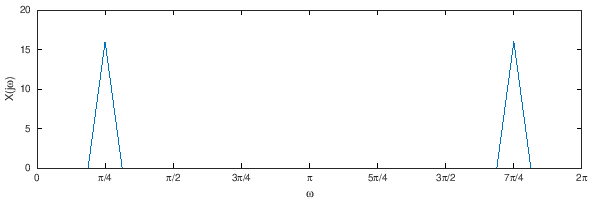

In [3]:
X = fft(x);
figure(2, 'position',[0,0,600,200]);
w = linspace(0,2*pi,length(n)+1); w = w(1:end-1);
plot(w,abs(X)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});

O diagrama abaixo apresenta o sistemas que realiza um downsampling por um fator $M$.

![downsampling](imgs/downsampling.png)

No GNU Octave, a função downsample implementa tal sistemas. Veja o help dela:

In [4]:
help downsample

'downsample' is a function from the file /usr/share/octave/packages/signal-1.4.1/downsample.m

 -- Function File: Y = downsample (X, N)
 -- Function File: Y = downsample (X, N, OFFSET)
     Downsample the signal, selecting every Nth element.  If X is a
     matrix, downsample every column.

     For most signals you will want to use 'decimate' instead since it
     prefilters the high frequency components of the signal and avoids
     aliasing effects.

     If OFFSET is defined, select every Nth element starting at sample
     OFFSET.

     See also: decimate, interp, resample, upfirdn, upsample.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at https://www.octave.org and via the help@octave.org
mailing list.


Vamos realizar um downsample por um fator $M=2$ sobre o sinal $x[n]$ definido anteriormente e iremos verificar o efeito no tempo e na frequência.

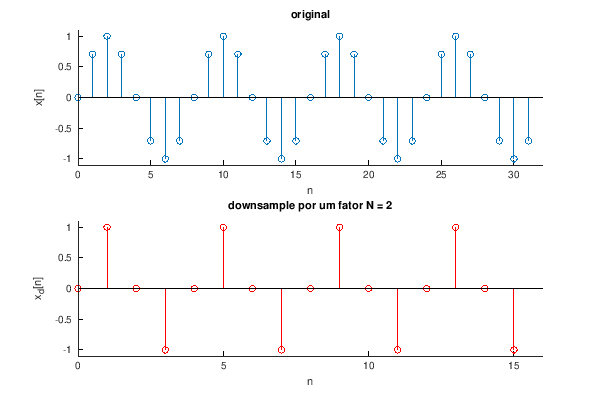

In [5]:
N = 2; % fator de downsample
xd = downsample(x,N);
nd = [0:length(xd)-1];
figure(3, 'position',[0,0,600,400]);
subplot(2,1,1);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]); title('original');
subplot(2,1,2);
stem(nd,xd,'r'); xlabel('n'); ylabel('x_d[n]'); ylim([-1.1, 1.1]); xlim([0 nd(end)+1]);
title(sprintf('downsample por um fator N = %d',N));

Obserque que, para obter $x_d[n]$, foram mantidas 1 a cada 2 amostras de $x[n]$. Ao final, teremos um vetor $x_d[n]$ com a metade no número de amostras de $x[n]$. 

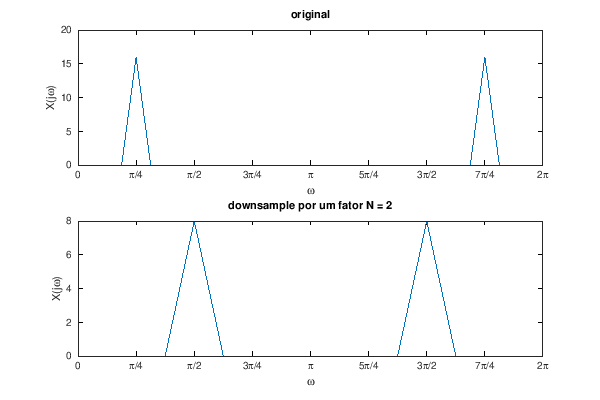

In [6]:
Xd = fft(xd);
figure(4, 'position',[0,0,600,400]);
wd = linspace(0,2*pi,length(nd)+1); wd = wd(1:end-1);
subplot(2,1,1);
plot(w,abs(X)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)'); title('original');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
subplot(2,1,2);
plot(wd,abs(Xd)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
title(sprintf('downsample por um fator N = %d',N));

Note como ocorreu um estiramento na frequência por um fator $N$ e a amplitude sofreu a multiplicação por um fator $1/N$. Além disso, são geradas $N-1$ cópias do espectro de $X(j\omega)$ (totalizando $N$). Logo, o pico observado em $3\pi/2$, em verdade, trata-se de uma cópia do espectro gerada pelo downsample. Isto fica mais claro na ilustração abaixo.

![downsample](imgs/downsamplingex2.png)

Como exemplo, vamos fazer agora um downsample com um fator $N=4$. Observe que neste caso, obteremos um sinal que não poderá ser utilizado para reconstruir o sinal original.

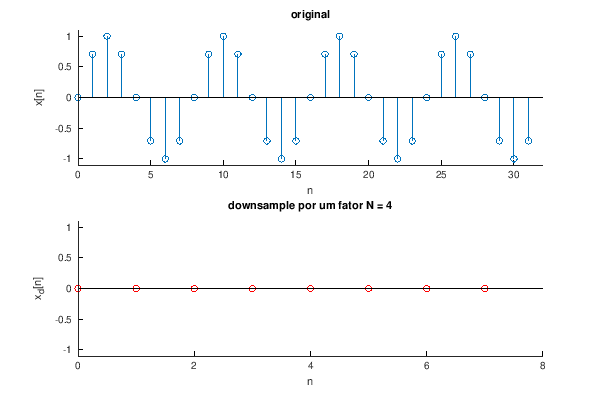

In [7]:
N = 4; % fator de downsample
xdd = downsample(x,N);
ndd = [0:length(xdd)-1];
figure(5, 'position',[0,0,600,400]);
subplot(2,1,1);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]); title('original');
subplot(2,1,2);
stem(ndd,xdd,'r'); xlabel('n'); ylabel('x_d[n]'); ylim([-1.1, 1.1]); xlim([0 ndd(end)+1]); 
title(sprintf('downsample por um fator N = %d',N));

Para reconstruir o sinal $x[n]$ a partir de $x_d[n]$, obtido com $N=2$, iremos utilizar um upsample e em seguida um filtro de reconstrução (interpolador). Como veremos a seguir, o upsample apenas insere zerso entre as amostras. Para um fator $L$, serão inseridos $L-1$ zeros entre as amostras do sinal de entrada. No domínio da frequência, corresponde a uma compressão por um fator $L$.

No diagrama de blocos, representamos o upsample da seguinte forma:

![upsample](imgs/upsampling.png)

Veja o help da função no GNU Octave.

In [8]:
help upsample

'upsample' is a function from the file /usr/share/octave/packages/signal-1.4.1/upsample.m

 -- Function File: Y = upsample (X, N)
 -- Function File: Y = upsample (X, N, OFFSET)
     Upsample the signal, inserting N-1 zeros between every element.

     If X is a matrix, upsample every column.

     If OFFSET is specified, control the position of the inserted sample
     in the block of N zeros.

     See also: decimate, downsample, interp, resample, upfirdn.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at https://www.octave.org and via the help@octave.org
mailing list.


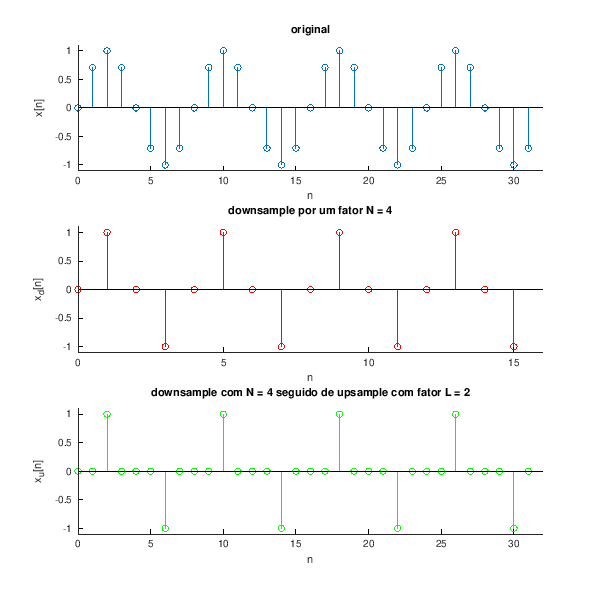

In [9]:
L = 2; % fator de upsample
xu = upsample(xd,L);
figure(6, 'position',[0,0,600,600]);
subplot(3,1,1);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]); title('original');
subplot(3,1,2);
stem(nd,xd,'r'); xlabel('n'); ylabel('x_d[n]'); ylim([-1.1, 1.1]); xlim([0 nd(end)+1]);
title(sprintf('downsample por um fator N = %d',N));
subplot(3,1,3);
stem(n,xu,'g'); xlabel('n'); ylabel('x_u[n]'); ylim([-1.1, 1.1]); xlim([0 n(end)+1]);
title(sprintf('downsample com N = %d seguido de upsample com fator L = %d',N,L));

Podemos verificar no gráfico acima que foram inseridos zeros entre as amostras.

Abaixo, iremos observar o espectro do sinal. Note que o upsample realiza uma compressão (mudança de escala) ao longo do eixo $\omega$, por um fator $L$.

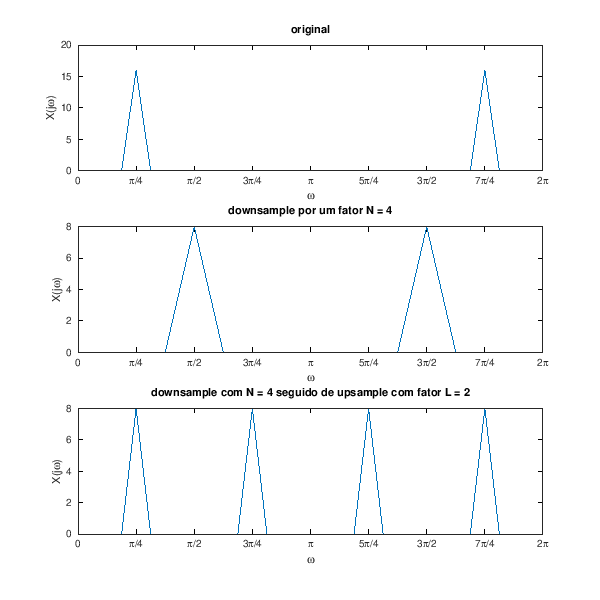

In [10]:
Xu = fft(xu);
figure(7, 'position',[0,0,600,600]);
subplot(3,1,1);
plot(w,abs(X)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)'); title('original');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
subplot(3,1,2);
plot(wd,abs(Xd)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
title(sprintf('downsample por um fator N = %d',N));
subplot(3,1,3);
plot(w,abs(Xu)); xlim([0 2*pi]); xlabel('\omega'); ylabel('X(j\omega)');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});
title(sprintf('downsample com N = %d seguido de upsample com fator L = %d',N,L));

Observando o espectro de $X_u(j\omega)$, é fácil constatar que podemos obter $X(j\omega)$ se utilizarmos um filtro passa-baixas ideal com frequência de corte $\omega_c = \pi/L$. Vamos então criar este filtro passa-baixas ideal no domínio da frequência.

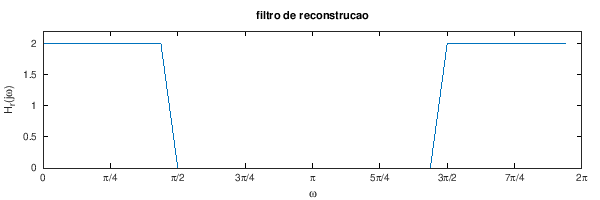

In [11]:
Wc = pi/L; % ou seja, 2pi/2L
Hr = L*[ones(1,n_samples/(2*L)) zeros(1,n_samples-n_samples/L) ones(1,n_samples/(2*L))];
figure(8, 'position',[0,0,600,200]);
plot(w,abs(Hr)); xlim([0 2*pi]); xlabel('\omega'); ylabel('H_r(j\omega)'); ylim([0 L*1.1]);
title('filtro de reconstrucao');
set(gca,'xtick',[0 pi/4 pi/2 3*pi/4 pi 5*pi/4 3*pi/2 7*pi/4 2*pi]); 
set(gca,'xticklabel',{'0', '\pi/4', '\pi/2', '3\pi/4', '\pi', '5\pi/4', '3\pi/2', '7\pi/4', '2\pi'});

Agora, vamos realizar a filtragem, também no domínio da frequência (uma multiplicação) e obter $x_r[n]$ utilizando a transformada inversa de Fourier (ifft). 

Ao comparar $x_r[n]$ obtido, podemos constatar que foi possível recuperar $x[n]$.

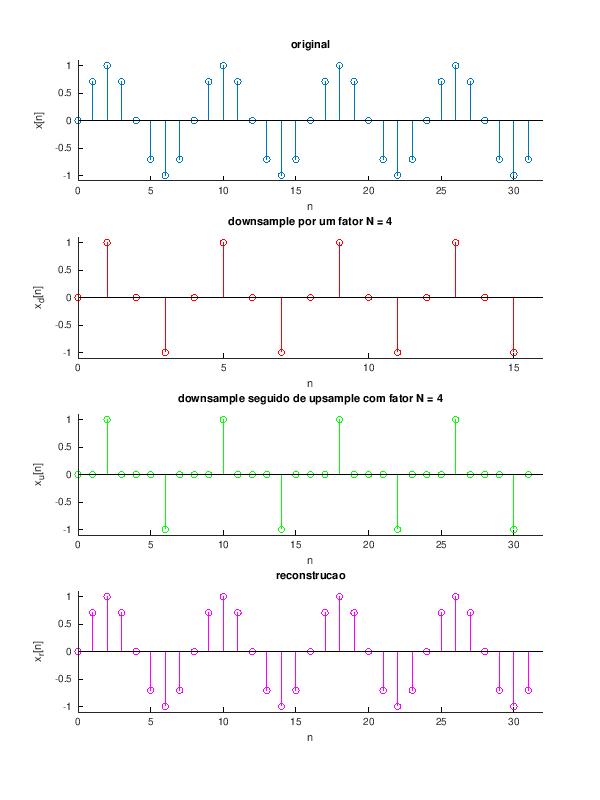

In [12]:
Xr = Xu.*Hr;
xr = ifft(Xr);
figure(9, 'position',[0,0,600,800]);
subplot(4,1,1);
stem(n,x); xlabel('n'); ylabel('x[n]'); ylim([-1.1, 1.1]); xlim([0, n(end)+1]); title('original');
subplot(4,1,2);
stem(nd,xd,'r'); xlabel('n'); ylabel('x_d[n]'); ylim([-1.1, 1.1]); xlim([0 nd(end)+1]);
title(sprintf('downsample por um fator N = %d',N));
subplot(4,1,3);
stem(n,xu,'g'); xlabel('n'); ylabel('x_u[n]'); ylim([-1.1, 1.1]); xlim([0 n(end)+1]);
title(sprintf('downsample seguido de upsample com fator N = %d',N));
subplot(4,1,4);
stem(n,xr,'m'); xlabel('n'); ylabel('x_r[n]'); ylim([-1.1, 1.1]); xlim([0 n(end)+1]);
title('reconstrucao');

O que ocorrerá se utilizarmos um fator de down/upsampling igual a $3$? e $4$? e $5$? Faça analíticamente e depois confira os resultados simulando no GNU Octave.

### Aliasing

A utilização direta do downsample pode acarretar em *aliasing*, por este motivo o help da função avisa:
"For most signals you will want to use 'decimate' instead since it prefilters the high frequency components of the signal and avoids aliasing effects".

Vejamos o help da função decimate. E execute o exemplo disponível nela.

In [13]:
help decimate

'decimate' is a function from the file /usr/share/octave/packages/signal-1.4.1/decimate.m

 -- Function File: Y = decimate (X, Q)
 -- Function File: Y = decimate (X, Q, N)
 -- Function File: Y = decimate (..., "fir")

     Downsample the signal X by a reduction factor of Q.  A lowpass
     antialiasing filter is applied to the signal prior to reducing the
     input sequence.  By default, an order N Chebyshev type I filter is
     used.  If N is not specified, the default is 8.

     If the optional argument '"fir"' is given, an order N FIR filter is
     used, with a default order of 30 if N is not given.

     Note that Q must be an integer for this rate change method.

     Example:
          ## Generate a signal that starts away from zero, is slowly varying
          ## at the start and quickly varying at the end, decimate and plot.
          ## Since it starts away from zero, you will see the boundary
          ## effects of the antialiasing filter clearly.  Next you will see
    


Refaça os exemplos anteriores trocando downsample por decimate. Analise e compare os resultados.

Vamos agora analisar o efeito do downsample e decimate em uma imagem (obtida em https://en.wikipedia.org/wiki/Aliasing).


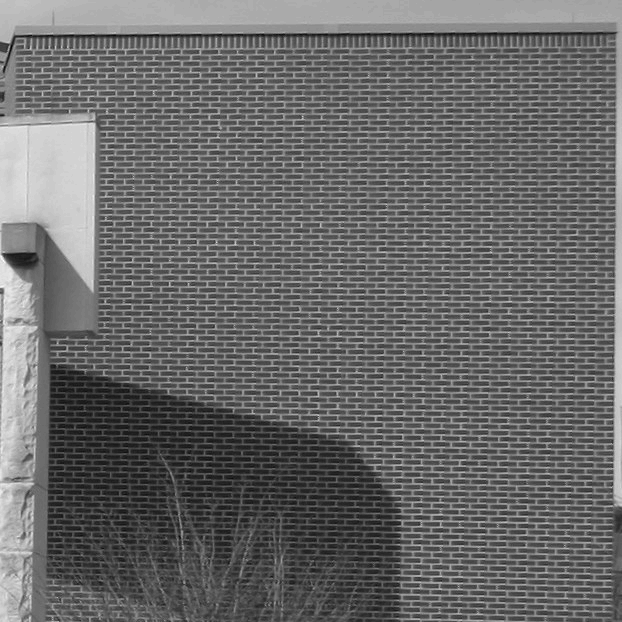

In [14]:
I = imread('imgs/bricks.png');
Ipb = rgb2gray(I);
imshow(Ipb);

Vamos realizar um downsample ao longo das linhas e colunas por um fator $N=3$. Note que, quando o argumento da função for uma matriz, a operação será realizada ao longo das colunas. Para realizar ao longo das linhas, vamos aplicar primeiramente à matriz transposta e traspor novamente o resultado, antes de aplicar novamente o downsample (desta vez, ao longo das colunas).

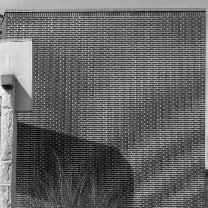

In [15]:
N = 3;
Id = downsample(downsample(Ipb',N)',N);
imshow(Id);

Podemos observar o *aliasing* como o padrão de uma ondulação de baixa frequência que não está presente na imagem original. Para evitar o *aliasing*, devemos utilizar a função decimate, como veremos baixo.

Diferentemente da função downsample, a função decimate realiza a decimanção apenas em um vetor. Vamos utilizar então a função blockproc para replicar o comportamento ao longo de todas as colunas.

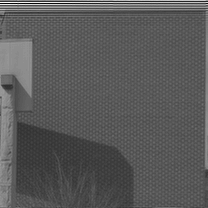

In [16]:
pkg load image;
N = 3;
decimante_N = @(x) decimate(x,N);
temp = blockproc(Ipb,[size(Ipb,1), 1],decimante_N); % decimate columns
Ide = blockproc(temp,[1, size(Ipb,2)],decimante_N); % decimante lines
imshow(Ide);

Observamos que agora o *aliasing* não está mais presente.